<a href="https://colab.research.google.com/github/Ummemadiha/HunarIntern-T1/blob/main/Housepricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving house price data.csv to house price data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Set plot style
sns.set(style="whitegrid")

In [3]:
# Load the CSV
df = pd.read_csv('house price data.csv')

# Display the first 5 rows
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
# Drop non-numeric or irrelevant columns
df_cleaned = df.drop(columns=['date', 'street', 'city', 'statezip', 'country'], errors='ignore')

# Check for missing values
print("Missing values:\n", df_cleaned.isnull().sum())

# Drop rows with missing values if any
df_cleaned = df_cleaned.dropna()

Missing values:
 price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64


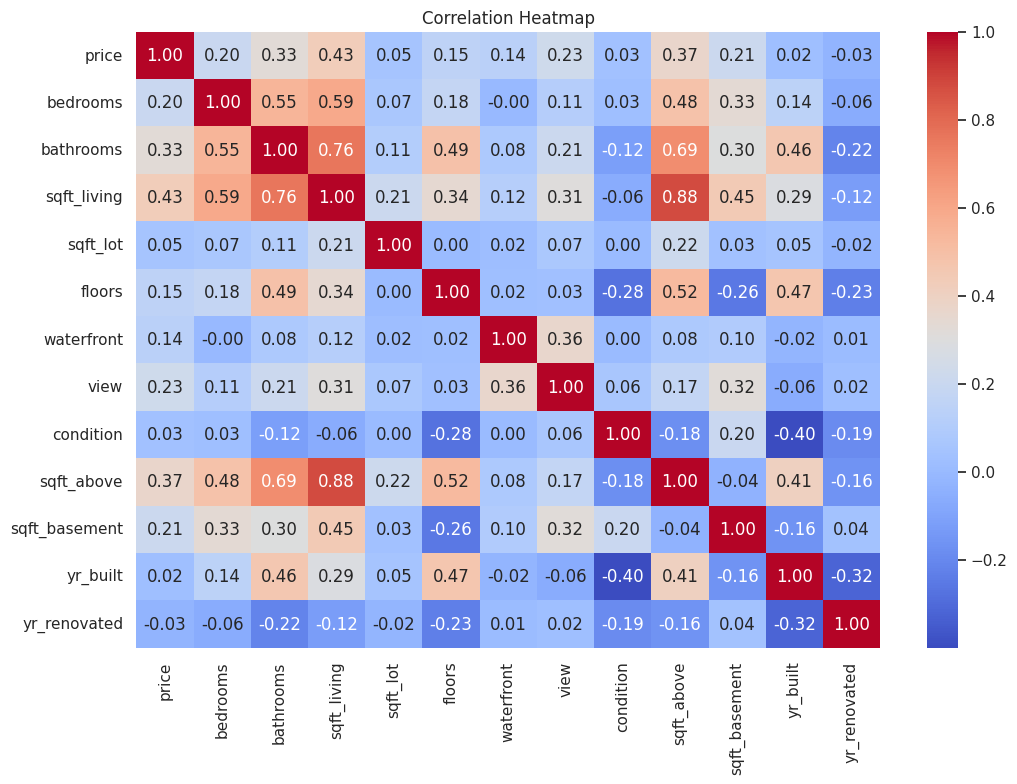

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

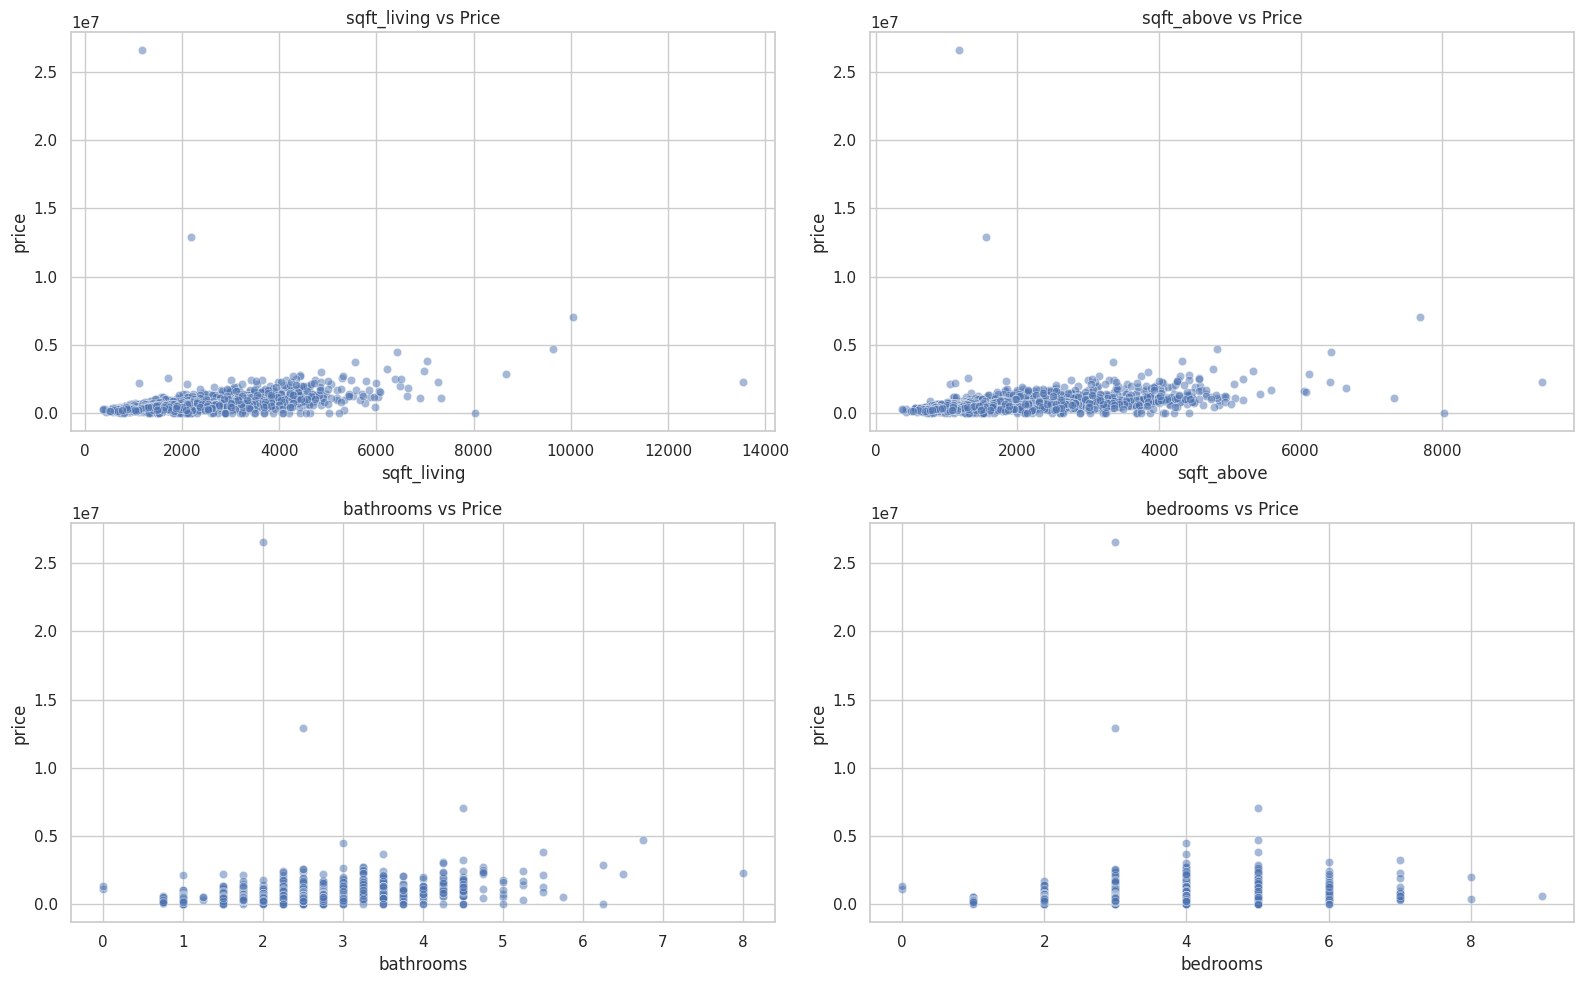

In [7]:
top_features = ['sqft_living', 'sqft_above', 'bathrooms', 'bedrooms']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df_cleaned, x=feature, y='price', alpha=0.5)
    plt.title(f"{feature} vs Price")
plt.tight_layout()
plt.show()

In [8]:
# Features and Target
X = df_cleaned.drop(columns='price')
y = df_cleaned['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [9]:
# Evaluation Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Intercept:", model.intercept_)
print("Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.2f}")

R² Score: 0.032283856632802865
RMSE: 993439.3625461488
Intercept: 4925638.066193099
Coefficients:
bedrooms: -64497.46
bathrooms: 36520.44
sqft_living: 186.05
sqft_lot: -0.51
floors: 69824.74
waterfront: 382459.67
view: 44755.84
condition: 29335.54
sqft_above: 96.86
sqft_basement: 89.19
yr_built: -2569.16
yr_renovated: 8.26


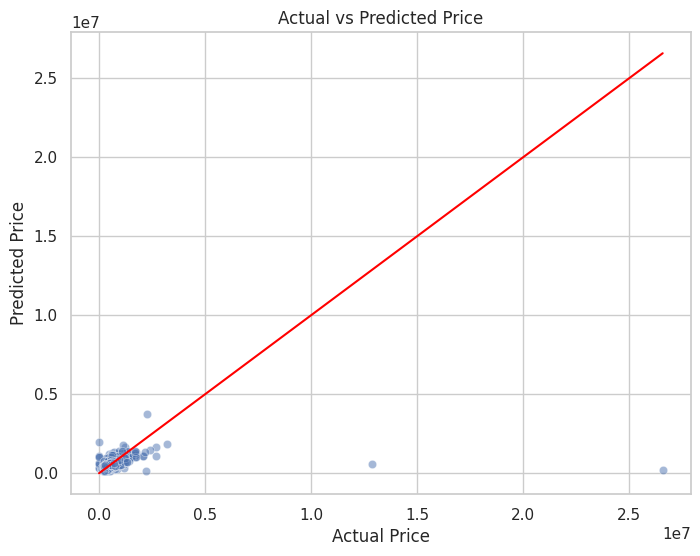

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

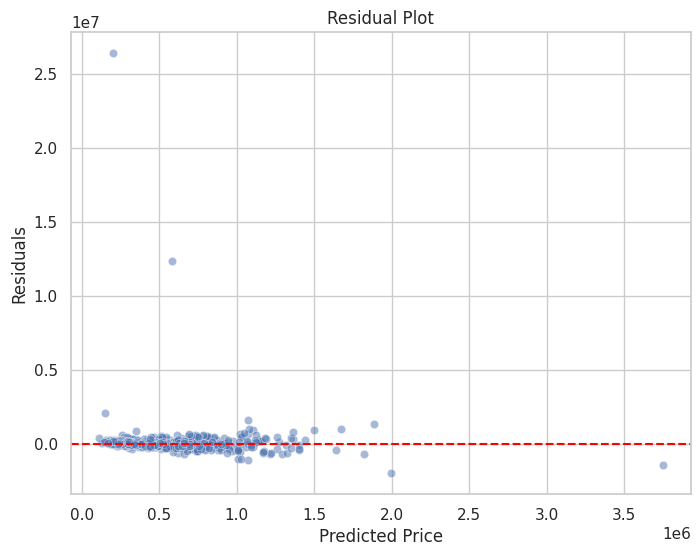

In [11]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

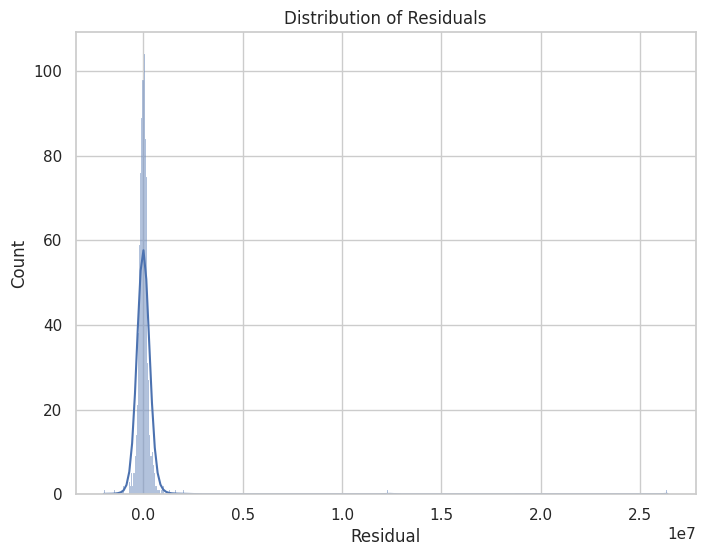

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()